In [1]:
import numpy as np
import astropy.units as u 
import scipy.stats as st
import scipy.special as sp
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
df = pd.read_csv(r"CountingStatistics.png.csv")
df

,Trial,Rate,Trial.1,Rate.1,Trial.2,Rate.2,Trial.3,Rate.3,Trial.4,Rate.4
0,1,18,21,12,41,13,61,12,81,13
1,2,10,22,9,42,15,62,16,82,16
2,3,9,23,16,43,15,63,11,83,13
3,4,19,24,12,44,17,64,12,84,17
4,5,10,25,12,45,18,65,12,85,10
5,6,13,26,15,46,9,66,14,86,10
6,7,12,27,10,47,12,67,6,87,7
7,8,19,28,12,48,12,68,13,88,12
8,9,15,29,10,49,9,69,21,89,13
9,10,16,30,17,50,8,70,14,90,13


In [4]:
rate = np.full(100,0)
i=0
for trial in df['Rate']:
    rate[i] = trial
    i += 1
for trial in df['Rate.1']:
    rate[i] = trial
    i += 1
for trial in df['Rate.2']:
    rate[i] = trial
    i += 1
for trial in df['Rate.3']:
    rate[i] = trial
    i += 1
for trial in df['Rate.4']:
    rate[i] = trial
    i += 1

In [5]:
df = pd.read_csv(r"PlateauRegion.png.csv")
df

,High Voltage (V),Rate (1/s),Amplitude (mV) (w/capacitor)
0,400,0,5
1,440,0,7
2,480,0,5
3,520,0,4
4,560,0,6
5,600,0,4
6,640,0,102
7,680,0,192
8,720,11,308
9,760,13,336


In [6]:
voltage           = np.array(df['High Voltage (V)'])
plateau_rate      = np.array(df['Rate (1/s)'])
amplitude         = np.array(df['Amplitude (mV) (w/capacitor)'])

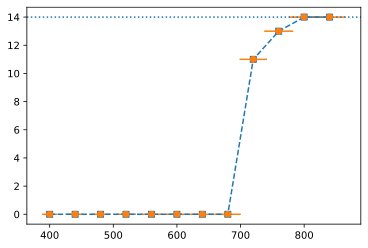

In [7]:
# plt.plot(voltage,amplitude)
plt.plot(voltage,plateau_rate,'s--')
plt.errorbar(voltage, plateau_rate, xerr=voltage*0.03, fmt='o')
plt.axhline(y=14, linestyle=':')


plateau_voltage = 840 # Volts, where graph no longer increases.

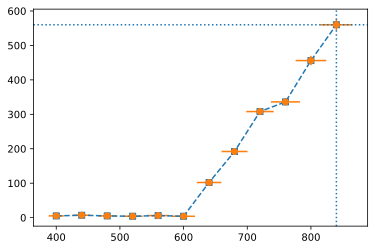

In [8]:
counter_threshold = 560 # mV.

plt.plot(voltage,amplitude,'s--')
plt.errorbar(voltage, amplitude, xerr=voltage*0.03, yerr=amplitude*0.03, fmt='o')
hlin = plt.axhline(y=counter_threshold, linestyle=':')
vlin = plt.axvline(x=plateau_voltage, linestyle=':')


In [9]:
df = pd.read_csv(r"ExternalCapacitor.png.csv")
print(df)

# With capacitor, C_K:
# tau = R(C+C_K)
# amplitude = Q/(C+C_K)

# Without capacitor:
# tau = RC
# amplitude = Q/C

osc_resistance = (df['Time Constant (ms)'][0]*10**-3 - df['Time Constant (ms)'][1]*10**-3)/(1.8*10**-9)
print('internal resistance: ', osc_resistance)

internal_capacitance = (df['Time Constant (ms)'][1]*10**-3)/osc_resistance
print('internal capacitance: ', internal_capacitance)

charge1 = df['Amplitude (V)'][0]*(internal_capacitance+1.8*10**-9)
charge2 = (df['Amplitude (V)'][1]*df['Time Constant (ms)'][1]*10**-3)/osc_resistance



Q_final = np.mean([charge1,charge2])
print('Q for with and without: ', charge1, charge2, Q_final)

                Unnamed: 0  Voltage (V)  Amplitude (V)  Time Constant (ms)
0  With Capacitor (1.8 nF)          840          0.568               1.248
1        Without Capacitor          840          1.500               0.522
internal resistance:  403333.33333333326
internal capacitance:  1.2942148760330581e-09
Q for with and without:  1.7575140495867769e-09 1.9413223140495874e-09 1.849418181818182e-09


In [10]:
df = pd.read_csv(r"Background.png.csv")
df

background_count_rate = df['Counts'][0]/df['Time(s)'][0]
background_seconds_per_count = 1/background_count_rate
print('we expect ',background_count_rate, 'events per second, and ',background_seconds_per_count,'between events.')

we expect  0.4053156146179402 events per second, and  2.4672131147540983 between events.


In [11]:
df = pd.read_csv(r"LeadShieldingExperiment.png.csv")
df

,height (m),width (m),mass(kg),count,time (s)
0,0.00000,0.00000,0.000,1044,149.0
1,0.10352,0.10255,0.098,1038,128.0
2,0.10355,0.10255,0.298,1050,164.0
3,0.10140,0.10011,0.680,1044,237.0
4,0.10140,0.10011,0.977,1044,285.0
5,0.10130,0.10011,1.760,1046,512.0
6,0.10230,0.10311,2.446,1034,804.0
7,0.10225,0.10355,2.968,980,1022.0
8,0.10125,0.10255,3.745,1007,1423.0


In [12]:
height   = np.array(df['height (m)'])
width    = np.array(df['width (m)'])
mass     = np.array(df['mass(kg)'])
count    = np.array(df['count'])
count    = np.array(df['time (s)'])

# Now to do some stuff!

In [13]:
def poisson(m,λ):
    pb = np.exp(-λ)*(λ**m)/sp.factorial(m)
    return pb

Text(0.5, 1.0, 'Probability Density of Rate Counts')

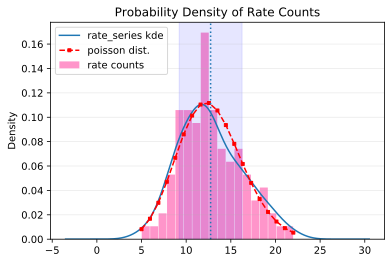

In [42]:
unique = len(set(rate))
s                = pd.Series(rate)
fig, ax          = plt.subplots()
s.plot.kde(label='rate_series kde')
n_i, bins, patches = plt.hist(x=rate, bins=unique, color='hotpink',
                            alpha=0.7, rwidth=.95, density=True,label='rate counts')
rate = np.sort(rate, axis=None)
mean   = np.mean(rate)
stdev  = np.std(rate)

plt.plot(bins,poisson(bins,mean),'s--',markersize=3,color='red',label='poisson dist.')
plt.axvline(x=mean, linestyle=':')
ax.axvspan(mean-stdev,mean+stdev, alpha=0.1, color='blue')

plt.grid(axis='y', alpha=0.25)
plt.legend(loc='upper left')
plt.title('Probability Density of Rate Counts')

In [26]:
dof = unique-1-1 # reduction by calculated mean value.

In [27]:
def chi_red(n_i,bins,mean):
    chi     = np.sum((100*n_i-(100*poisson(bins[0:-1],mean)))**2/(100*poisson(bins[0:-1],mean)))
    chi_red = chi/dof
    return chi_red

In [28]:
chi_red(n_i,bins,mean)

0.5942060595846914